## Why you might want to visualize your data before drawing conclusions.

In [15]:
import pandas as pd
from scipy.stats import linregress

In [16]:
# Load the data
df = pd.read_csv("DD.csv")

df.head()

,dataset,x,y
0,dino,55.3846,97.1795
1,dino,51.5385,96.0256
2,dino,46.1538,94.4872
3,dino,42.8205,91.4103
4,dino,40.7692,88.3333


In [17]:
# Well there should be like 13 datasets

## Group data by 'dataset' column, maintaining the order of appearance
datasets = {label: group[['x', 'y']] for label, group in df.groupby('dataset', sort=False)}

## The different datasets
print('Unique datasets:', df['dataset'].nunique())
for i, (label, dataset) in enumerate(datasets.items(), start=1):
    print(f"{i}: {label}")

Unique datasets: 13
1: dino
2: away
3: h_lines
4: v_lines
5: x_shape
6: star
7: high_lines
8: dots
9: circle
10: bullseye
11: slant_up
12: slant_down
13: wide_lines


In [31]:
# Create an empty list to store the statistics
stats_data = []

# Iterate over each dataset
for i, (label, dataset) in enumerate(datasets.items(), start=1):
    # Compute the statistics
    mean = dataset.mean().to_dict()
    variance = dataset.var().to_dict()
    correlation = dataset.corr().iloc[0, 1]
    slope, intercept, r_value, _, _ = linregress(dataset['x'], dataset['y'])
    r_squared = r_value**2  # Calculate R^2
    covariance = dataset.cov().iloc[0, 1]  # Get covariance between x and y

    # Append the statistics to the list
    stats_data.append({
        'Dataset': label,
        'Mean X': mean['x'], 
        'Mean Y': mean['y'],
        'Variance X': variance['x'], 
        'Variance Y': variance['y'],
        'Covariance XY': covariance,
        'Correlation': correlation,
        'Intercept': intercept, 
        'Slope': slope,
        'R^2': r_squared,

    })

# Convert list to DataFrame
stats_df = pd.DataFrame(stats_data)

# Print the DataFrame
display(stats_df.style.background_gradient(cmap='viridis', axis=1))




,Dataset,Mean X,Mean Y,Variance X,Variance Y,Covariance XY,Correlation,Intercept,Slope,R^2
0,dino,54.263273,47.832253,281.069988,725.515961,-29.113933,-0.064472,53.452978,-0.103583,0.004157
1,away,54.266100,47.834721,281.227029,725.749775,-28.971572,-0.064128,53.425130,-0.103018,0.004112
2,h_lines,54.261442,47.830252,281.095333,725.756931,-27.874816,-0.061715,53.211087,-0.099165,0.003809
3,v_lines,54.269927,47.836988,281.231512,725.638809,-31.371608,-0.069446,53.890843,-0.111551,0.004823
4,x_shape,54.260150,47.839717,281.231481,725.224991,-29.618418,-0.065583,53.554226,-0.105317,0.004301
5,star,54.267341,47.839545,281.197993,725.239695,-28.432772,-0.062961,53.326679,-0.101113,0.003964
6,high_lines,54.268805,47.835450,281.122364,725.763490,-30.943012,-0.068504,53.808793,-0.110070,0.004693
7,dots,54.260303,47.839829,281.156953,725.235215,-27.247681,-0.060341,53.098342,-0.096913,0.003641
8,circle,54.267320,47.837717,280.898024,725.226844,-30.846620,-0.068343,53.797045,-0.109814,0.004671
9,bullseye,54.268730,47.830823,281.207393,725.533372,-30.979902,-0.068586,53.809471,-0.110167,0.004704


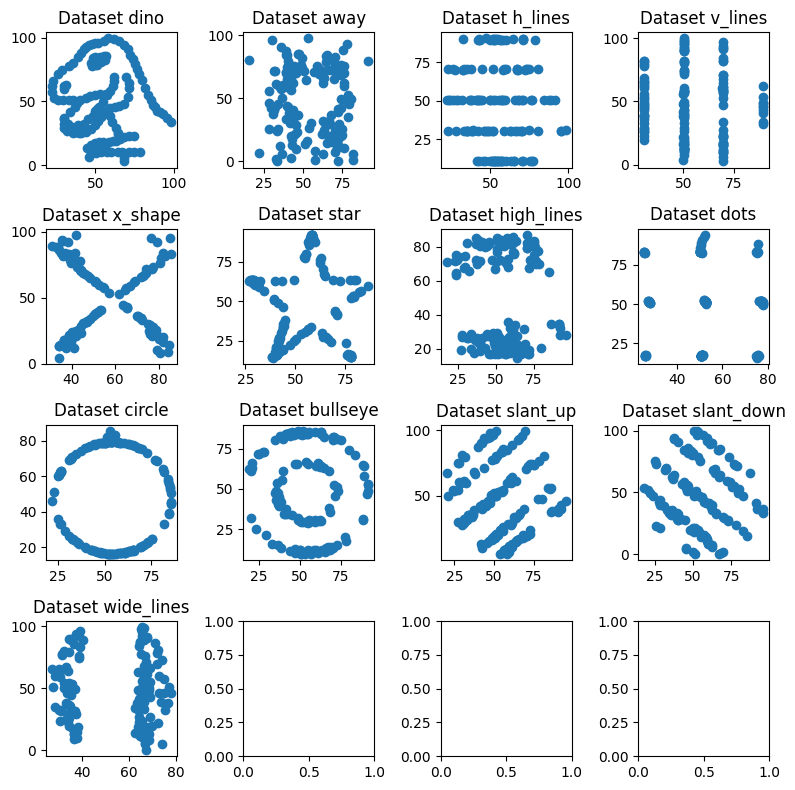

In [53]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(4, 4, figsize=(8, 8))

# Flatten the axs array to iterate over it
axs = axs.flatten()

# Iterate over the datasets and plot each one
for i, (label, data) in enumerate(datasets.items()):
    # Plot the dataset in the corresponding subplot
    axs[i].scatter(data['x'], data['y'])
    axs[i].set_title(label)

# Adjust the spacing between subplots to prevent label overlap
plt.tight_layout()

# Show the figure
plt.show()

